# Stock Market prediction using LSTMs 

In [106]:
!pip install numpy==1.19.5 

In [1]:
# Data Collection using pandas datareaders 
import pandas_datareader as pdr
import pandas as pd
import numpy as np

In [4]:
np.__version__

'1.19.5'

In [5]:
key = "453ccefb94e7d534f35bb432da0f9e4abf344b4f"

In [6]:
data = pdr.get_data_tiingo("AAPL",api_key = key)

In [8]:
data.head()

close     high      low    open    volume  \
symbol date                                                                    
AAPL   2016-09-19 00:00:00+00:00  113.58  116.180  113.250  115.19  47023046   
       2016-09-20 00:00:00+00:00  113.57  114.120  112.510  113.05  34514269   
       2016-09-21 00:00:00+00:00  113.55  113.989  112.441  113.85  36003185   
       2016-09-22 00:00:00+00:00  114.62  114.940  114.000  114.35  31073984   
       2016-09-23 00:00:00+00:00  112.71  114.790  111.550  114.42  52481151   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2016-09-19 00:00:00+00:00  26.625172  27.234658  26.547814  27.002584   
       2016-09-20 00:00:00+00:00  26.622827  26.751757  26.374345  26.500930   
       2016-09-21 00:00:00+00:00  26.618139  26.721048  26.358170  26.688464   
       2016-09-22 00:00:00+00:00  26.868966  26.943980  26.723627  26.805673   
       2016-09-23 00:00:00+00:00  26.421228  26.908817  26.149304  26.822083   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2016-09-19 00:00:00+00:00  188092184      0.0          1.0  
       2016-09-20 00:00:00+00:00  138057076      0.0          1.0  
       2016-09-21 00:00:00+00:00  144012740      0.0          1.0  
       2016-09-22 00:00:00+00:00  124295936      0.0          1.0  
       2016-09-23 00:00:00+00:00  209924604      0.0          1.0

In [9]:
data.to_csv("AAPL.csv")

In [10]:
data = pd.read_csv("AAPL.csv")

In [11]:
data = data.reset_index()["close"]

In [12]:
data.shape

(1259,)

In [13]:
# as LSTMs are sensitive to the scale of the data we are going to scale our data using the MinMax Scaling


In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler(feature_range =(0,1))
data = scaler.fit_transform(np.array(data).reshape(-1,1))

In [16]:
data.shape

(1259, 1)

In [17]:
data[1250:]

array([[0.12732904],
       [0.12338279],
       [0.12078525],
       [0.10804736],
       [0.10949598],
       [0.10592437],
       [0.10819721],
       [0.10759778],
       [0.10077926]])

# Pre-processing the DAta

in the timeseries data we should not split the data using train_test_split all using the random seed because the data are relative, every element is relative with it"s previous element and it"s next element 
so we are going to calculate the training size and the test size and spliting the data 

In [18]:
training_size = int(len(data) *0.7)
test_size = len(data) - training_size
train_data , test_data = data[:training_size,:], data[training_size:,:1]

In [19]:
train_data.shape

(881, 1)

In [20]:
test_data.shape

(378, 1)

Now we will convert our dataset into a matrix which has the features and their labels, the labels are the values to predict

In [21]:
def create_dataset(dataset,timestep=1): 
    Xs,Ys= [], []
    for i in range(len(dataset)-timestep-1): 
        # i = 0,1,2,3,4....
        x = dataset[i:i+timestep,0]
        Xs.append(x)
        Ys.append(dataset[i+timestep,0])
    return np.array(Xs),np.array(Ys)

In [24]:
time_step =100
x_train , y_train = create_dataset(train_data,time_step)
x_test,y_test = create_dataset(test_data,time_step)

In [25]:
#we are going to reshape our x_train because we will give it to an LSTM model so we reshape to make vectors of data
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [26]:
x_test.shape

(277, 100, 1)

# Creating the model  

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM , Dense

In [38]:
model = Sequential()
model.add(LSTM(50,return_sequences =True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))


In [39]:
model.compile(loss="mean_squared_error",optimizer  "adam")

0.019656326489834675

In [46]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs =100,batch_size = 64,verbose=1)

Epoch 1/100
13/13 [==============================] - 2s 164ms/step - loss: 2.0415e-04 - val_loss: 0.0082
Epoch 2/100
13/13 [==============================] - 3s 198ms/step - loss: 1.9717e-04 - val_loss: 0.0076
Epoch 3/100
13/13 [==============================] - 2s 168ms/step - loss: 2.2937e-04 - val_loss: 0.0073
Epoch 4/100
13/13 [==============================] - 2s 168ms/step - loss: 3.9555e-04 - val_loss: 0.0086
Epoch 5/100
13/13 [==============================] - 2s 161ms/step - loss: 3.2328e-04 - val_loss: 0.0070
Epoch 6/100
13/13 [==============================] - 2s 167ms/step - loss: 2.5860e-04 - val_loss: 0.0078
Epoch 7/100
13/13 [==============================] - 2s 170ms/step - loss: 2.0798e-04 - val_loss: 0.0071
Epoch 8/100
13/13 [==============================] - 2s 163ms/step - loss: 2.3707e-04 - val_loss: 0.0073
Epoch 9/100
13/13 [==============================] - 2s 161ms/step - loss: 1.9014e-04 - val_loss: 0.0069
Epoch 10/100
13/13 [==============================] - 2

13/13 [==============================] - 2s 161ms/step - loss: 1.4748e-04 - val_loss: 0.0041
Epoch 79/100
13/13 [==============================] - 2s 160ms/step - loss: 1.2698e-04 - val_loss: 0.0041
Epoch 80/100
13/13 [==============================] - 2s 175ms/step - loss: 1.3241e-04 - val_loss: 0.0042
Epoch 81/100
13/13 [==============================] - 2s 186ms/step - loss: 1.4389e-04 - val_loss: 0.0041
Epoch 82/100
13/13 [==============================] - 2s 181ms/step - loss: 1.3591e-04 - val_loss: 0.0042
Epoch 83/100
13/13 [==============================] - 2s 166ms/step - loss: 1.2786e-04 - val_loss: 0.0040
Epoch 84/100
13/13 [==============================] - 2s 179ms/step - loss: 1.3743e-04 - val_loss: 0.0039
Epoch 85/100
13/13 [==============================] - 2s 172ms/step - loss: 1.2929e-04 - val_loss: 0.0039
Epoch 86/100
13/13 [==============================] - 2s 171ms/step - loss: 1.1940e-04 - val_loss: 0.0038
Epoch 87/100
13/13 [==============================] - 2s 16

In [47]:
model.evaluate(x_test)

9/9 [==============================] - 0s 1ms/step - loss: 0.0000e+00


0.0

In [48]:
train_predict  = model.predict(x_train)
test_predict = model.predict(x_test)

since our data are scaled we are inversing the scaling to have meaningfull data

In [49]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


In [50]:
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

196.9898489448072

In [62]:
math.sqrt(mean_squared_error(y_test,test_predict))

163.03410833716606

In [53]:
import matplotlib.pyplot as plt 
%matplotlib inline

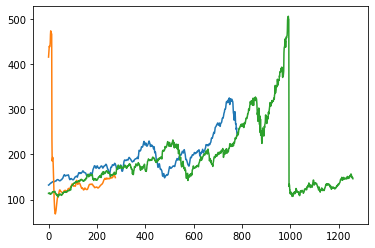

In [58]:
plt.plot(train_predict)
plt.plot(test_predict)
plt.plot(scaler.inverse_transform(data))

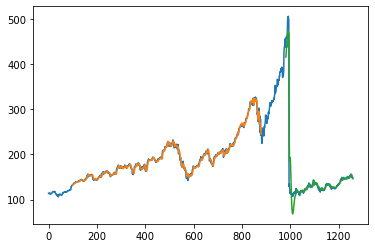

In [74]:
look_back = 100 
train_predict_plot = np.empty_like(data)
train_predict_plot[:,:] = np.nan
train_predict_plot[look_back: len(train_predict) + look_back,: ] = train_predict

test_predict_plot = np.empty_like(data)
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_predict)  + (look_back*2) +1:len(data)-1,: ] = test_predict



plt.plot(scaler.inverse_transform(data))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

In [76]:
test_predict_plot.shape

(1259, 1)

# Predicting the future 30 days

In [78]:
len(test_data)

378

In [82]:
in_put = test_data[278:].reshape(1,-1)

In [85]:
in_put.shape


(1, 100)

In [89]:
in_put = list(in_put)[0].tolist()

In [106]:
np.array(in_put)

array([0.06960887, 0.06935911, 0.0643139 , 0.06701134, 0.05529747,
       0.05592187, 0.06001798, 0.06119187, 0.05279984, 0.05045207,
       0.04260952, 0.0481043 , 0.05429842, 0.05135122, 0.04780459,
       0.04740497, 0.05394875, 0.04925321, 0.05342425, 0.05292472,
       0.05279984, 0.04887857, 0.04720516, 0.04638094, 0.04832909,
       0.04453269, 0.05040212, 0.05042709, 0.0525251 , 0.05349918,
       0.0509516 , 0.05404865, 0.06186623, 0.05976822, 0.06104201,
       0.06513812, 0.06181627, 0.06641191, 0.07060792, 0.06990859,
       0.06918427, 0.06843499, 0.07260602, 0.07647735, 0.07805085,
       0.07882512, 0.08554373, 0.09068885, 0.0970578 , 0.09373595,
       0.09840651, 0.09688296, 0.09973026, 0.10849693, 0.10682352,
       0.10160348, 0.09176283, 0.10100405, 0.09913083, 0.1026275 ,
       0.10702333, 0.10809731, 0.10255258, 0.09808182, 0.09973026,
       0.10027973, 0.09943054, 0.10402618, 0.10300215, 0.10327689,
       0.10097907, 0.10085419, 0.09963035, 0.10027973, 0.10784

In [108]:
lst_output = []
i = 0 
n_steps = 100
while i<30: 
    #checking the len(in_put)
    if len(in_put)>100: 
        # it means that we insert a new element into the array and we didn't shift on element 
        x_input = np.array(in_put[1:])
        print(f"{i+1} day input {x_input}")
        #reshaping the input to give them to the model
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape(1,n_steps,1)
        print(x_input.shape)
        y_hat = model.predict(x_input,verbose=0)
        print(f"{i+1} day output {y_hat}")
        in_put.extend(y_hat[0].tolist())
        in_put = in_put[1:]
        
        lst_output.extend(y_hat[0].tolist())
        i +=1
        
    else: 
        x_input = np.array(in_put).reshape(1,n_steps,1)
        y_hat  = model.predict(x_input,verbose=0)
        print(y_hat[0])
        in_put.extend(y_hat[0].tolist())
        lst_output.extend(y_hat[0].tolist())
        i+=1
        
print(lst_output)

0 day input [0.06935911 0.0643139  0.06701134 0.05529747 0.05592187 0.06001798
 0.06119187 0.05279984 0.05045207 0.04260952 0.0481043  0.05429842
 0.05135122 0.04780459 0.04740497 0.05394875 0.04925321 0.05342425
 0.05292472 0.05279984 0.04887857 0.04720516 0.04638094 0.04832909
 0.04453269 0.05040212 0.05042709 0.0525251  0.05349918 0.0509516
 0.05404865 0.06186623 0.05976822 0.06104201 0.06513812 0.06181627
 0.06641191 0.07060792 0.06990859 0.06918427 0.06843499 0.07260602
 0.07647735 0.07805085 0.07882512 0.08554373 0.09068885 0.0970578
 0.09373595 0.09840651 0.09688296 0.09973026 0.10849693 0.10682352
 0.10160348 0.09176283 0.10100405 0.09913083 0.1026275  0.10702333
 0.10809731 0.10255258 0.09808182 0.09973026 0.10027973 0.09943054
 0.10402618 0.10300215 0.10327689 0.10097907 0.10085419 0.09963035
 0.10027973 0.10784754 0.10837205 0.11341725 0.11109446 0.10152855
 0.10237774 0.10609921 0.1098956  0.10967081 0.1065238  0.10447575
 0.10712323 0.11841251 0.11519057 0.11688896 0.11973

7 day output [[0.10632801]]
8 day input [0.05045207 0.04260952 0.0481043  0.05429842 0.05135122 0.04780459
 0.04740497 0.05394875 0.04925321 0.05342425 0.05292472 0.05279984
 0.04887857 0.04720516 0.04638094 0.04832909 0.04453269 0.05040212
 0.05042709 0.0525251  0.05349918 0.0509516  0.05404865 0.06186623
 0.05976822 0.06104201 0.06513812 0.06181627 0.06641191 0.07060792
 0.06990859 0.06918427 0.06843499 0.07260602 0.07647735 0.07805085
 0.07882512 0.08554373 0.09068885 0.0970578  0.09373595 0.09840651
 0.09688296 0.09973026 0.10849693 0.10682352 0.10160348 0.09176283
 0.10100405 0.09913083 0.1026275  0.10702333 0.10809731 0.10255258
 0.09808182 0.09973026 0.10027973 0.09943054 0.10402618 0.10300215
 0.10327689 0.10097907 0.10085419 0.09963035 0.10027973 0.10784754
 0.10837205 0.11341725 0.11109446 0.10152855 0.10237774 0.10609921
 0.1098956  0.10967081 0.1065238  0.10447575 0.10712323 0.11841251
 0.11519057 0.11688896 0.11973625 0.12135971 0.12732904 0.12338279
 0.12078525 0.10804736

15 day output [[0.105869]]
16 day input [0.04925321 0.05342425 0.05292472 0.05279984 0.04887857 0.04720516
 0.04638094 0.04832909 0.04453269 0.05040212 0.05042709 0.0525251
 0.05349918 0.0509516  0.05404865 0.06186623 0.05976822 0.06104201
 0.06513812 0.06181627 0.06641191 0.07060792 0.06990859 0.06918427
 0.06843499 0.07260602 0.07647735 0.07805085 0.07882512 0.08554373
 0.09068885 0.0970578  0.09373595 0.09840651 0.09688296 0.09973026
 0.10849693 0.10682352 0.10160348 0.09176283 0.10100405 0.09913083
 0.1026275  0.10702333 0.10809731 0.10255258 0.09808182 0.09973026
 0.10027973 0.09943054 0.10402618 0.10300215 0.10327689 0.10097907
 0.10085419 0.09963035 0.10027973 0.10784754 0.10837205 0.11341725
 0.11109446 0.10152855 0.10237774 0.10609921 0.1098956  0.10967081
 0.1065238  0.10447575 0.10712323 0.11841251 0.11519057 0.11688896
 0.11973625 0.12135971 0.12732904 0.12338279 0.12078525 0.10804736
 0.10949598 0.10592437 0.10819721 0.10759778 0.10077926 0.10492409
 0.10445209 0.10454212 

23 day output [[0.1061114]]
24 day input [0.04453269 0.05040212 0.05042709 0.0525251  0.05349918 0.0509516
 0.05404865 0.06186623 0.05976822 0.06104201 0.06513812 0.06181627
 0.06641191 0.07060792 0.06990859 0.06918427 0.06843499 0.07260602
 0.07647735 0.07805085 0.07882512 0.08554373 0.09068885 0.0970578
 0.09373595 0.09840651 0.09688296 0.09973026 0.10849693 0.10682352
 0.10160348 0.09176283 0.10100405 0.09913083 0.1026275  0.10702333
 0.10809731 0.10255258 0.09808182 0.09973026 0.10027973 0.09943054
 0.10402618 0.10300215 0.10327689 0.10097907 0.10085419 0.09963035
 0.10027973 0.10784754 0.10837205 0.11341725 0.11109446 0.10152855
 0.10237774 0.10609921 0.1098956  0.10967081 0.1065238  0.10447575
 0.10712323 0.11841251 0.11519057 0.11688896 0.11973625 0.12135971
 0.12732904 0.12338279 0.12078525 0.10804736 0.10949598 0.10592437
 0.10819721 0.10759778 0.10077926 0.10492409 0.10445209 0.10454212
 0.10488971 0.1053037  0.10568648 0.10599315 0.106207   0.10632801
 0.10636703 0.10634152 

We are going now to plot the graph with the predicted values 

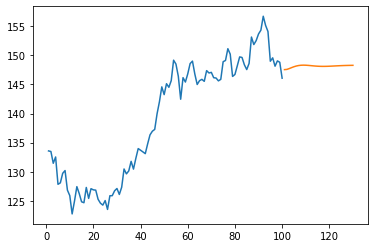

In [117]:
plt.plot(np.arange(1,101) ,scaler.inverse_transform(data[1159:]))
plt.plot(np.arange(101,131), scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)))

This was one of my many notebooks for learning about deep learning and it's diffrent model, you can fined another implementation of LSTMs using *PyTorch*..